[참고](https://www.kaggle.com/code/nilanml/imdb-review-deep-model-94-89-accuracy)   
[참고2](https://kubig-2021-2.tistory.com/62) 

### Bag of Words Meets Bags of Popcorn 

In [5]:
import pandas as pd 

In [63]:
train = pd.read_csv('labeledTrainData.tsv', header=0, delimiter='\t', quoting=3) 
test = pd.read_csv('testData.tsv', header=0, delimiter='\t', quoting=3)

In [10]:
train.head(1) 

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."


##### 토큰화 -> 불용어 처리 -> 어간 추출 -> 벡터화 

In [11]:
!pip3 show BeautifulSoup4  

Name: beautifulsoup4
Version: 4.12.2
Summary: Screen-scraping library
Home-page: 
Author: 
Author-email: Leonard Richardson <leonardr@segfault.org>
License: 
Location: E:\Program\Lib\site-packages
Requires: soupsieve
Required-by: conda-build, nbconvert


In [12]:
from bs4 import BeautifulSoup

In [20]:
example1 = BeautifulSoup(train['review'][0], "html.parser")   
print(train['review'][0][:700]) 
print("\n")  
print(example1.get_text()[:700])  

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely lik


"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to mayb

In [24]:
# 정규표현식을 사용해서 특수문자를 제거
import re
# 소문자와 대문자가 아닌 것은 공백으로 대체한다.
# ^ : not을 의미
letters_only = re.sub('[^a-zA-z]', ' ', example1.get_text())
letters_only[:700] 

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyw'

In [25]:
lower_case = letters_only.lower()  
words = lower_case.split()  
print(len(words))  
words[:10]

437


['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with']

In [26]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('stopwords')
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geg66\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [28]:
words = [w for w in words if not w in stopwords.words('english')]   
print(len(words)) 
words[:10]

219


['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary']

In [30]:
from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer('english')  
words = [stemmer.stem(w) for w in words]  

words[:10]

['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [31]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('fly'))
print(wordnet_lemmatizer.lemmatize('flies'))

words = [wordnet_lemmatizer.lemmatize(w) for w in words]

# 처리 후 단어
words[:10]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geg66\AppData\Roaming\nltk_data...


fly
fly


['stuff',
 'go',
 'moment',
 'mj',
 'start',
 'listen',
 'music',
 'watch',
 'odd',
 'documentari']

In [32]:
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()  
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)  
    words = letters_only.lower().split()  
    stops = set(stopwords.words('english'))  
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]  

    return (' '.join(stemming_words))

In [33]:
clean_review = review_to_words(train['review'][0])  
clean_review 

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obvious messag drug bad kay visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene bottom line movi peopl like mj one level anoth think peopl stay

In [37]:
clean_train_reviews = []
for i in range(0, train.shape[0]):
     if (i + 1) % 5000 == 0 :  #실행이 잘되는지 확인하기 위해 5000개 실행될때마다 확인문구
         print('Review {} of {}'.format(i+1, train.shape[0])) 
     clean_train_reviews.append(review_to_words(train['review'][i])) 

# %time은 주피터 노트북에서 지워나는 매직 커맨드 
%time train['review_clean'] = train['review'].apply(review_to_words) 

Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000
CPU times: total: 31.9 s
Wall time: 32 s


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# 튜토리얼과 다르게 파라미터 값을 수정
# 파라미터 값만 수정해도 캐글 스코어 차이가 많이 남
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(1, 3),
                             max_features = 5000)
vectorizer

CountVectorizer(max_features=5000, min_df=2, ngram_range=(1, 3))

In [40]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 분류기를 사용
forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)

forest  

RandomForestClassifier(n_jobs=-1, random_state=2018)

In [46]:
train_data_features = vectorizer.fit_transform(clean_train_reviews)
train_data_features.shape 

(25000, 5000)

In [52]:
# clean_train_reviews[0:2] 

In [58]:
%time forest = forest.fit(train_data_features, train['sentiment'])

from sklearn.model_selection import cross_val_score 
import numpy as np 
%time score = np.mean(cross_val_score(forest, train_data_features, train['sentiment'], cv=10, scoring='roc_auc'))   

CPU times: total: 2min 31s
Wall time: 20.6 s
CPU times: total: 14 s
Wall time: 2min 48s


In [59]:
score

0.922193088

In [64]:
clean_test_reviews = []
for i in range(0, test.shape[0]):
     if (i + 1) % 5000 == 0 :  #실행이 잘되는지 확인하기 위해 5000개 실행될때마다 확인문구
         print('Review {} of {}'.format(i+1, test.shape[0]))
     clean_test_reviews.append(review_to_words(test['review'][i]))

Review 5000 of 25000
Review 10000 of 25000
Review 15000 of 25000
Review 20000 of 25000
Review 25000 of 25000


In [65]:
test_data_features = vectorizer.fit_transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

result = forest.predict(test_data_features)
output = pd.DataFrame(data={"id":test["id"], "sentiment" : result, "review":test["review"]})
output    # kaggle score : 0.85360

,id,sentiment,review
0,"""12311_10""",0,"""Naturally in a film who's main themes are of ..."
1,"""8348_2""",0,"""This movie is a disaster within a disaster fi..."
2,"""5828_4""",0,"""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""",1,"""Afraid of the Dark left me with the impressio..."
4,"""12128_7""",0,"""A very accurate depiction of small time mob l..."
...,...,...,...
24995,"""2155_10""",0,"""Sony Pictures Classics, I'm looking at you! S..."
24996,"""59_10""",0,"""I always felt that Ms. Merkerson had never go..."
24997,"""2531_1""",0,"""I was so disappointed in this movie. I am ver..."
24998,"""7772_8""",1,"""From the opening sequence, filled with black ..."


In [67]:
!pip install WordCloud 

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ---------------------------------------- 300.2/300.2 kB 4.6 MB/s eta 0:00:00


In [70]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline  

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

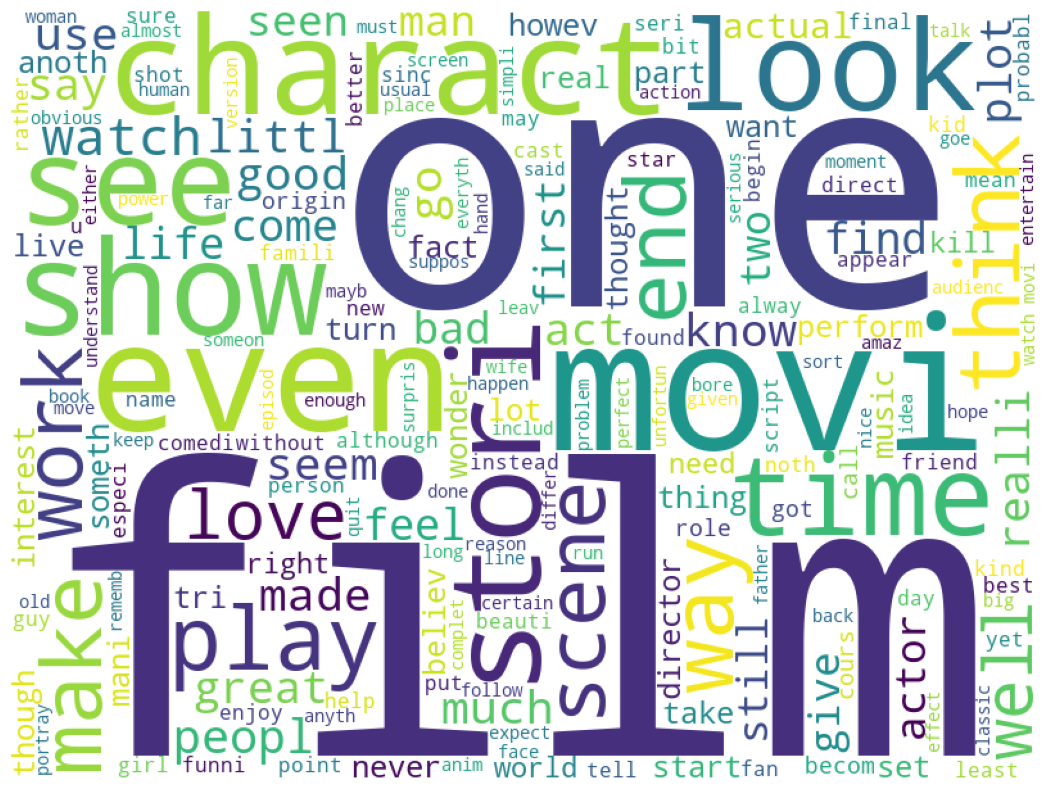

CPU times: total: 12.5 s
Wall time: 12.9 s


In [71]:
# train 데이터의 모든 단어에 대한 워드 클라우드를 그려본다. 
%time displayWordCloud(' '.join(clean_train_reviews)) 